1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [72]:
# If haven't downloaded it yet, please get the data file with wget
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

--2022-11-21 19:47:41--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2022-11-21 19:47:41--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8ea803f131b2b9901a9e1da568.dl.dropboxusercontent.com/cd/0/inline/BxMAtYyMkllO8LUeQl47nAKIbNzp40-jEXbtVdwz0TLft8IAJnBbDQYNlNTIOejXfpxkKpp-8OO9I0q3_yptV64bxkkj3xz9RAKYqB1vp86jhATxGwinn8TIS9P-J0Yx2HzOA-yKFlydIbL0NPaDdy4I2gNeGSjuvdUm8Bbb9iXexg/file# [following]
--2022-11-21 19:47:42--  https://uc8ea803f131b2b9901a9e1da568.dl.dropboxusercontent.com/cd/0/inline/BxMAtYyMkllO8LUeQl47nAKIbNzp40-jEXbtVdwz0TLft8IAJnBbDQYNlNTIOejXfpxkKpp-8OO9I0q3_yptV64bxkkj3xz9R

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [11]:
import pandas as pd # standard naming convention
import numpy as np
import matplotlib.pyplot as plt
file_name = "./data/data_000637.txt"
data = pd.read_csv(file_name)
data
print(data.shape)
N=np.random.randint(10000,data.shape[0])
#N= data.shape[0]
df=pd.DataFrame(data[:N])
df

(1310720, 6)


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
694725,1,0,123,3869206944,1201,12
694726,1,0,53,3869206944,1199,9
694727,1,0,139,3869206944,1201,0
694728,1,0,56,3869206944,1200,16


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [12]:
x = df.groupby("ORBIT_CNT")["BX_COUNTER"].max()
print('The number of BX in a ORBIT is : \n',x.max())


The number of BX in a ORBIT is : 
 3563


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [13]:
#df.loc[0,'Absolute Time'] = 25/30* df.loc[0,'TDC_MEAS'] + 25*df.loc[0,'BX_COUNTER']  + 3563 *df.loc[0,'BX_COUNTER']*25

tdc_meas = 25/30* (df['TDC_MEAS']-df.loc[0,'TDC_MEAS'])
BX_counter = 25*(df['BX_COUNTER']- df.loc[0,'BX_COUNTER'])
orbit_CNT = 3563*25*(df['ORBIT_CNT'] -df.loc[0,'ORBIT_CNT'])
df['Absolute Time'] = tdc_meas.cumsum() + BX_counter.cumsum() +orbit_CNT.cumsum()

df['Absolute Time'] = pd.to_timedelta(df['Absolute Time'], unit="ns")
df
#df.loc['Absolute Time'] =  25/30* df.loc[i,'TDC_MEAS'] + 25*df.loc[i,'BX_COUNTER']  + 3563 *df.loc[i,'BX_COUNTER']*25

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Absolute Time
0,1,0,123,3869200167,2374,26,0 days 00:00:00
1,1,0,124,3869200167,2374,27,0 days 00:00:00
2,1,0,63,3869200167,2553,28,0 days 00:00:00.000004477
3,1,0,64,3869200167,2558,19,0 days 00:00:00.000009071
4,1,0,64,3869200167,2760,25,0 days 00:00:00.000018720
...,...,...,...,...,...,...,...
694725,1,0,123,3869206944,1201,12,2 days 11:52:59.010715530
694726,1,0,53,3869206944,1199,9,2 days 11:52:59.614347416
694727,1,0,139,3869206944,1201,0,2 days 11:53:00.217979345
694728,1,0,56,3869206944,1200,16,2 days 11:53:00.821611261


4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [14]:
print('The duration of the data is : ',df['Absolute Time'][len(df)-1] - df['Absolute Time'][0])

The duration of the data is :  2 days 11:53:01.425243293


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [15]:
print(df.groupby(['TDC_CHANNEL']).count()['HEAD'].sort_values(ascending = False)[:3])


TDC_CHANNEL
139    57638
64     34788
63     34149
Name: HEAD, dtype: int64


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [16]:
o =df.groupby(['ORBIT_CNT']).count()# count the number of rows for each values of ORBIT_CNT

print('There is :',len(o.index), 'non-empty orbits')

There is : 6774 non-empty orbits


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [17]:
df2 = df[df['TDC_CHANNEL']==139]
o =df2.groupby('ORBIT_CNT').count()

indexes = o.index.tolist()
print(len(indexes))

6749


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [18]:
import random
sr1 = pd.Series(df[df['FPGA']==0].groupby(['TDC_CHANNEL']).count()['HEAD'], index =df['TDC_CHANNEL'].sort_values()).drop_duplicates()
print('For FPGA = 0: \n',sr1)
sr2 = pd.Series(df[df['FPGA']==1].groupby(['TDC_CHANNEL']).count()['HEAD'], index =df['TDC_CHANNEL'].sort_values()).drop_duplicates()
print('\n\n For FPGA = 1: \n',sr2)

For FPGA = 0: 
 TDC_CHANNEL
1        645.0
2        822.0
3        812.0
4       1249.0
5        771.0
        ...   
124     8704.0
129        2.0
130       16.0
137       15.0
139    40400.0
Name: HEAD, Length: 121, dtype: float64


 For FPGA = 1: 
 TDC_CHANNEL
1      14975.0
2      17165.0
3      11601.0
4      13880.0
5       7881.0
        ...   
128      723.0
129       17.0
130       20.0
137       18.0
139    17238.0
Name: HEAD, Length: 122, dtype: float64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

Text(0.5, 1.0, 'FPGA = 1')

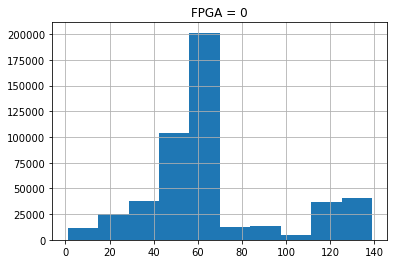

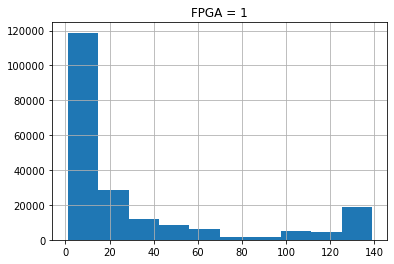

In [19]:

df1 = df[df['FPGA']==0]
histo1 = df1.hist(column = 'TDC_CHANNEL')
plt.title('FPGA = 0')
df2 = df[df['FPGA']==1]
histo1 = df2.hist(column = 'TDC_CHANNEL')
plt.title('FPGA = 1')